# Learning Objective

- Visualization using Matplotlib & Seaborn
- Univariate analysis using plots
- Bivariate analysis using plots

Categorical data:- 
  - Bar plot
  - Count plot
  - Piechart

Continuous Data:- 
  - Line plot
  - Histogram
  - KDE Plot

Bivariate and multivariate Analysis
  - Scatter plot
  - Box and violin plot
  - Heatmap
  - Pairplot


### Matplotlib


- Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

- In matplotlib we can create,customize and extend the plots.

- We can develop publication quality plots with just a few lines of code
Use interactive figures that can zoom, pan and update the plots.

## Seaborn

- Seaborn is a Python data visualization library based on matplotlib.

- Also closely integrated to the data structures from pandas.

- It provides beautiful default styles and color palettes to make statistical plots more attractive.

In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Case Study
## Data Visualization & plotting using a Houseprice dataset

The dataset contains various parameters of house. A home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.Let's visualize the data.



### Ques 1. Import the necessary libraries and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/IIIT-D Mentor_Notebook')

In [ ]:
df=pd.read_csv('House_Price.csv')

### Ques 2. Check a few samples of data using head() or tail() function of dataframe

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Ques 3. Check the statistics of data through describe() function

In [ ]:
df.describe()

In [ ]:
df.describe('O')

In [ ]:
df['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Ques 4. Comment on how the SalePrices are distributed throughout the data? Display the distribution using an appropriate plot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


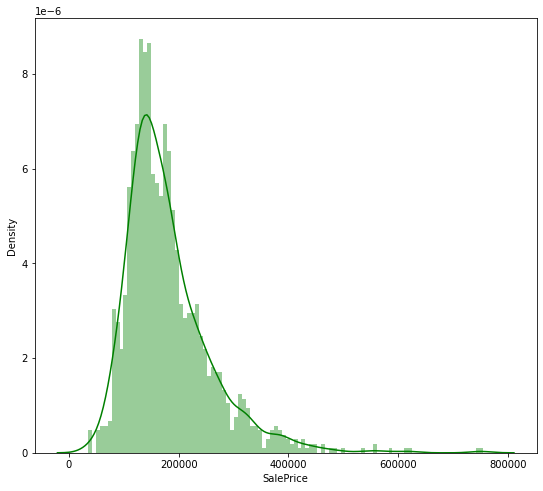

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

As we can see, distribution is right skewed(positive skewed) with most of the data falling to right side of the peak (with mean ~ 180921)

### Ques 5. Plot histogram for all the numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2fb5ebad0>,
      dtype=object)

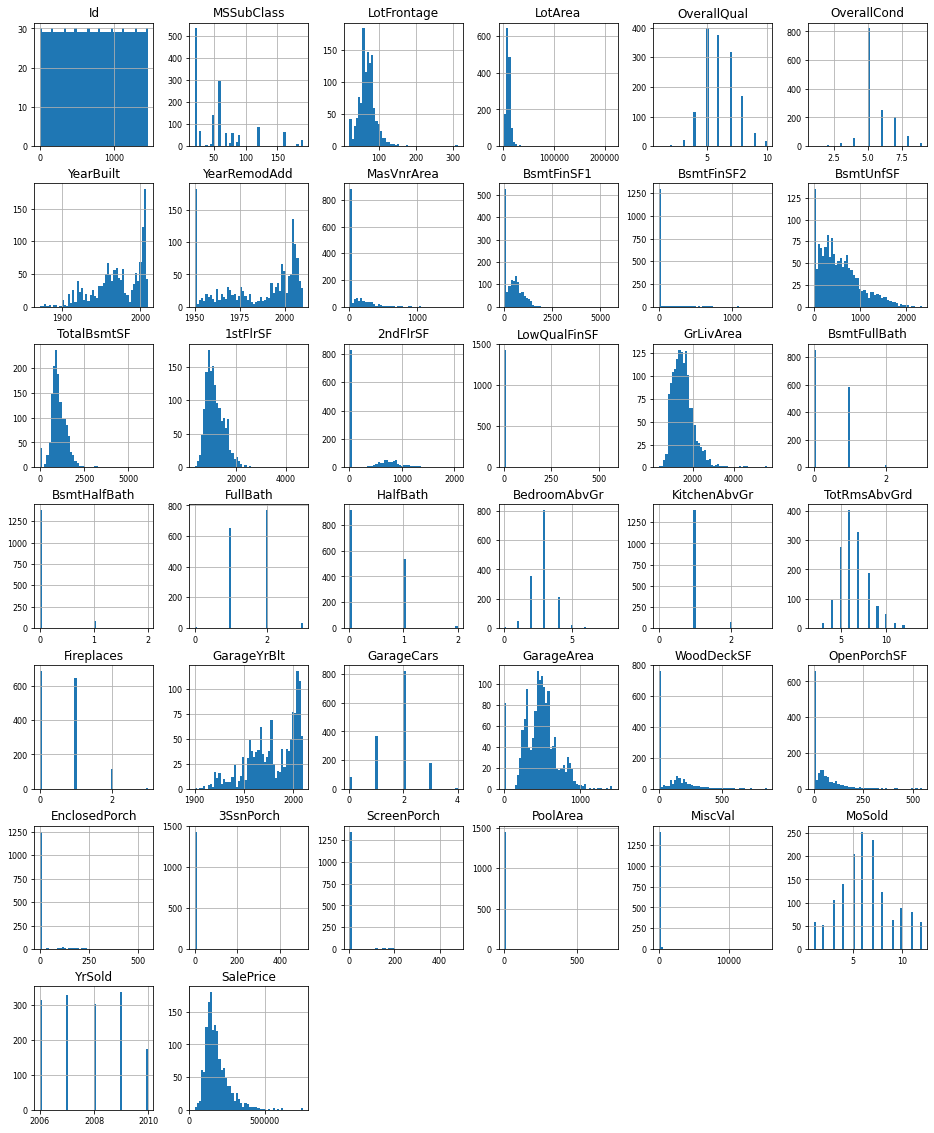

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Ques 6. Plot distribution of various numerical features with respect to SalePrice (Use Pairplot)

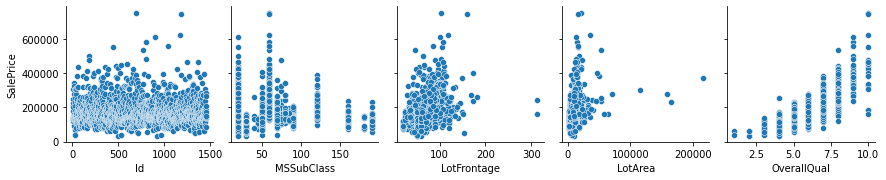

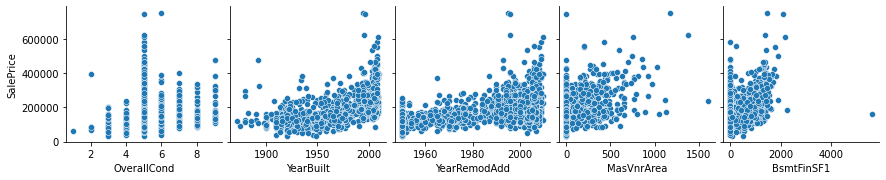

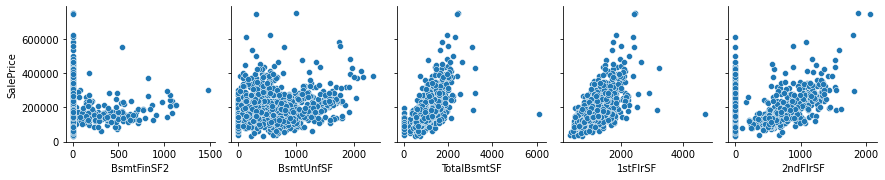

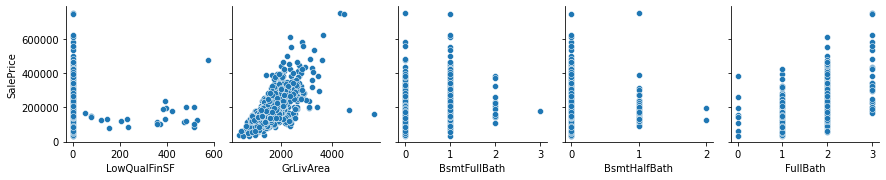

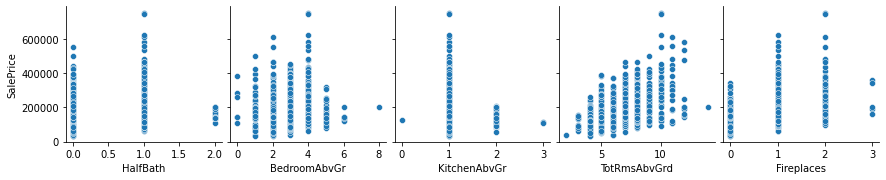

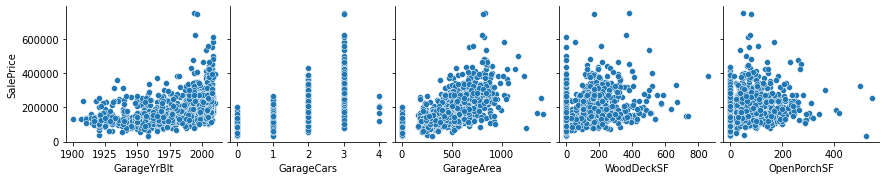

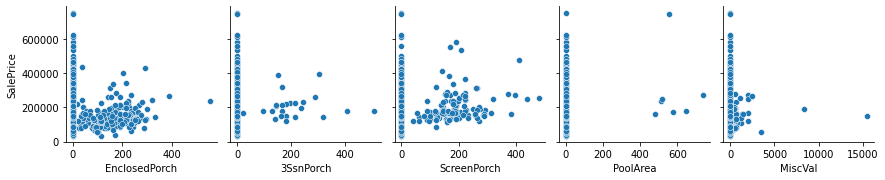

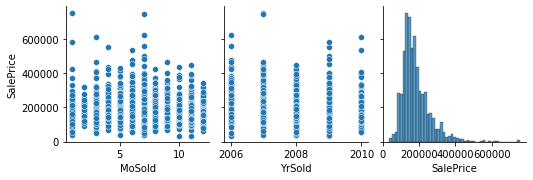

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

### Ques 7. Perform the bivariate analysis between BsmtExposure and SalePrice features.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

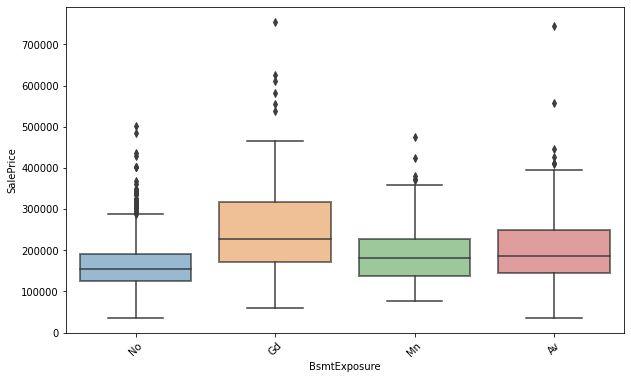

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### Ques 8. Perform the bivariate analysis between SaleCondition and SalePrice features.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

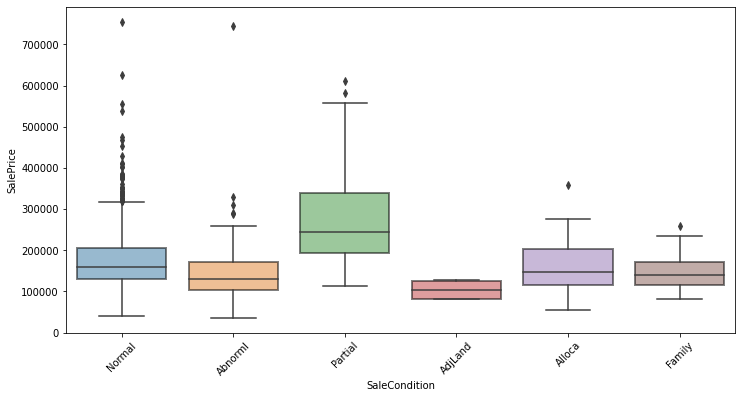

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### Ques 9. Perform the Economic Activity Analysis (i.e. The time houses were sold vs build) using stripplot from seaborn library.

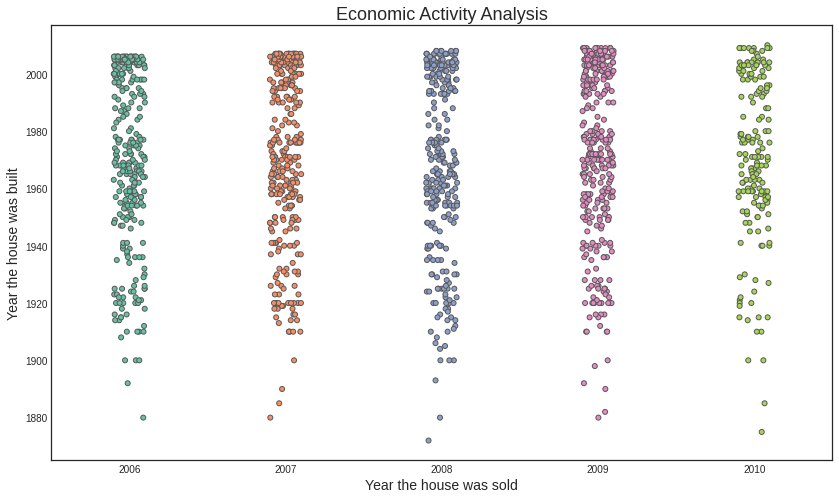

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-white')
sns.stripplot(x='YrSold', y='YearBuilt', data=df, jitter=True, palette="Set2", linewidth=1)
plt.title('Economic Activity Analysis', fontsize=18)
plt.xlabel('Year the house was sold', fontsize=14)
plt.ylabel('Year the house was built', rotation=90, fontsize=14)
plt.show()


### Ques 10. Check the Sales with respect to different Zones.

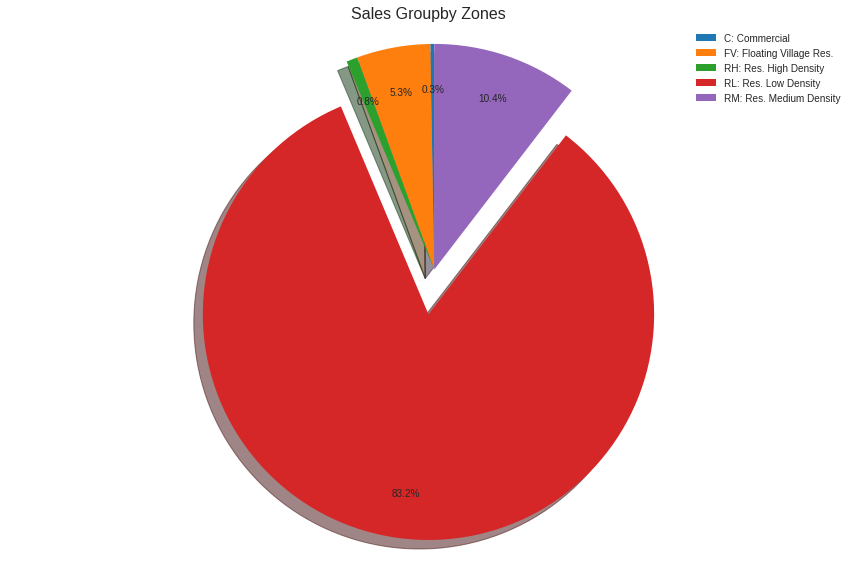

In [ ]:
plt.style.use('seaborn-white')
zone = df.groupby(by=['MSZoning'], as_index=False)['SalePrice'].sum()
zoning = zone['MSZoning'].values.tolist()

labels = ['C: Commercial', 'FV: Floating Village Res.', 'RH: Res. High Density', 'RL: Res. Low Density', 
          'RM: Res. Medium Density']
total_sales = zone['SalePrice'].values.tolist()
explode = (0, 0, 0, 0.1, 0)

fig, ax1 = plt.subplots(figsize=(12,8))
texts = ax1.pie(total_sales, explode=explode, autopct='%.1f%%', shadow=True, startangle=90, pctdistance=0.8,
       radius=0.5)


ax1.axis('equal')
plt.title('Sales Groupby Zones', fontsize=16)
plt.tight_layout()
plt.legend(labels, loc='best')
plt.show()

### Ques 11. How many houses were sold in each neighborhood ? (Hint : Use countplot) 

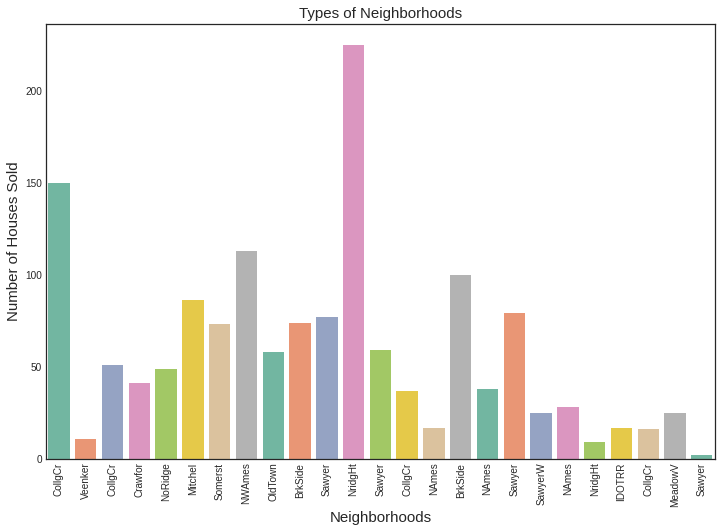

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="Neighborhood", data=df, palette="Set2")
ax.set_title("Types of Neighborhoods", fontsize=15)
ax.set_xlabel("Neighborhoods", fontsize=15)
ax.set_ylabel("Number of Houses Sold", fontsize=15)
ax.set_xticklabels(labels=df['Neighborhood'] ,rotation=90)
plt.show()

### Ques 12. Perform bivariate analysis of GrLivArea feature w.r.t. SalePrices

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


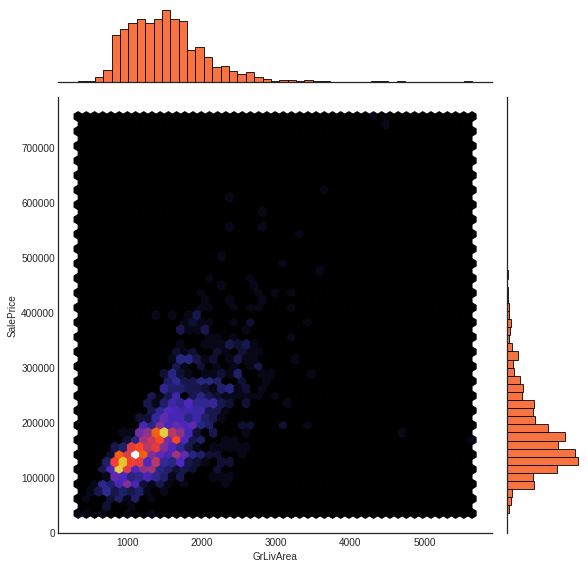

In [ ]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=df,
              kind='hex', cmap= 'CMRmap', size=8, color='#F84403')

plt.show()

### Ques 13. Check correlation of Numeric Features with Sale Price using heatmap from seaborn library

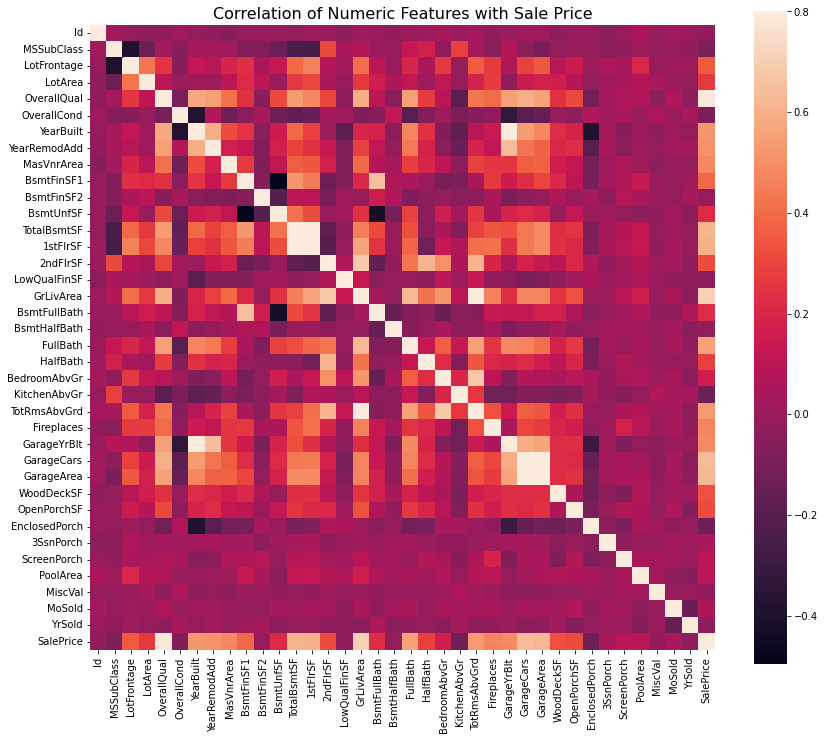

In [ ]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

sns.heatmap(df.corr(),square = True,  vmax=0.8)